# Описание проекта

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Для начала приоритизируем гипотезы, после запустим A/B-тест и проанализируем результаты. 

## Часть первая. Приоретизация гипотез

Мы имеем файл с данными о 9 гипотезах по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort

### Применю фреймворк ICE для приоритизации гипотез и отсортирую их по убыванию приоритета

In [1]:
import pandas as pd
import numpy as np

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis['ICE'] = ((hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts'])
hypothesis['ICE'] = hypothesis['ICE'].round(2)
pd.options.display.max_colwidth = 130
display(hypothesis.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


По фреймворку ICE я выявила 3 приоритетные гипотезы :

8 - Запустить акцию, дающую скидку на товар в день рождения;

1 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

Все из-за высоких показателей влиянения и уверенности. А показатель усилий у них средний 

### Применю фреймворк RICE и также отсортирую их по убыванию приоритета

In [3]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


По методу приоретизации гипотез RICE вывод поменялся. Приоритетные гипотезы : 

7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;

2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;

1 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Все из-за параметра reach, он отвечает за количество пользователей, на которых повлияет изменение. У гипотезы 7 и 2 показатель reach высокий. А у гипотезы 8 (Запустить акцию, дающую скидку на товар в день рождения), которая была приоритетной по методу ICE, reach низкий 

## Часть вторая. Анализ A/B-теста

Мы провели A/B-тесты и получили результаты, которые хранятся в файлах `orders` и `visitors`. Приступим к анализу

### Для начала испортирую необходимые для дальнейших действий библиотеки, после выведу первые пять строчек обоих таблиц для первичного ознакомления

In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(orders.head())

visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Поменяла тип в столбцах с датами на верный

### Проверю диапазон дат, в которых проводился тест

In [6]:
display(orders['date'].min())
display(orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

### Проверю наличие пропусков

In [7]:
display(orders.isna().sum())
visitors.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

### Проверю наличие явных дубликатов

In [8]:
display(orders.duplicated().sum())
visitors.duplicated().sum()

0

0

### Проверю сколько групп в нашем А/В тесте

In [9]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

### Рассмотрю количество пользователей в каждой группе

In [10]:
orders.groupby('group')['visitorId'].count()

group
A    557
B    640
Name: visitorId, dtype: int64

### Проверю, не попадают ли пользователи в обе группы

In [11]:
display(orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count())

double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()

orders = orders.query('visitorId not in @double_users')
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

group    0
dtype: int64

В обе группы попало 58 пользователей. Я их удалила, чтобы в дальнейшем они не искажали результаты

### Посмотрю динамику посетителей по дням и по группам

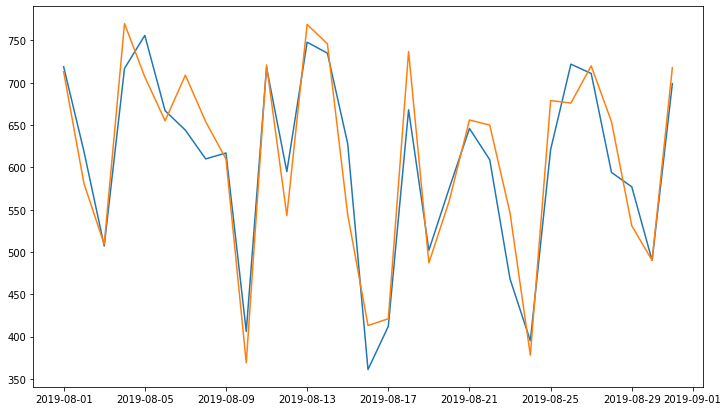

In [12]:
dinamicA = visitors.query('group == "A"').groupby('date')['visitors'].sum().reset_index()
dinamicB = visitors.query('group == "B"').groupby('date')['visitors'].sum().reset_index()
plt.figure(figsize=(12,7))
plt.plot(dinamicA['date'], dinamicA['visitors'],label = 'A')
plt.plot(dinamicB['date'], dinamicB['visitors'],label = 'B')
plt.legend;

На графике видно, что количество посетителей колеблется. В некоторые дни количество посетителей доходит до 750, а в другие дни опускается до 400

### Сделаю общую таблицу с кумулятивными значениями для дальнейшей работы

In [13]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))
display(data['date'].min())
data['date'].max()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Соединила обе таблицы в одну, высчитала кумулятивные значения для дальнейшего анализа

Также проверила диапазон дат, ничего ли не потерялось

### График кумулятивной выручки по группам

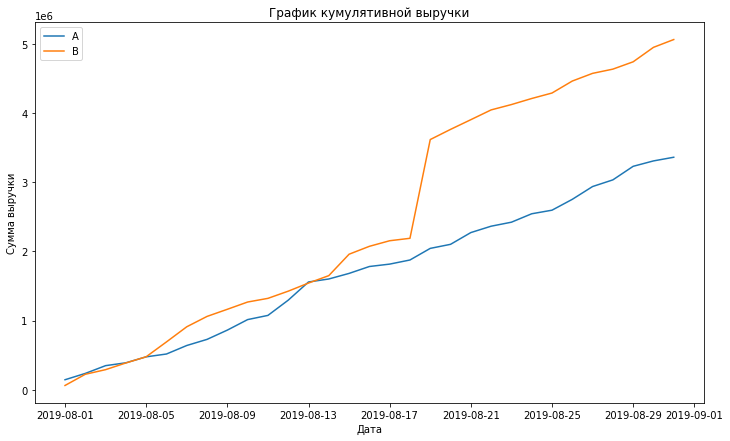

In [14]:
plt.figure(figsize=(12,7))
# Строим график выручки группы А
plt.plot(data['date'], data['revenueCummulativeA'], label='A')

# Строим график выручки группы B
plt.plot(data['date'], data['revenueCummulativeB'], label='B')
plt.title('График кумулятивной выручки')
plt.ylabel('Сумма выручки')
plt.xlabel('Дата')
plt.legend();

По графику можно сделать вывод, что в обоих группах выручка постепенно увеличивается. Практически сразу группа В опережает группу А, и примерно в середине месяца в группе В выручка резко увеличилась практически в два раза и так же со временем только растет, но отрыв с группой А уже стал гораздо больше

Такой резкий подъем больше похож на выброс, это может быть оптовая закупка товаров в середине месяца. Подробнее дальше рассмотрим графики кол-ва заказов и среднего чека, чтобы точно выяыить, что это за резкий подъем

### График кумулятивного среднего чека по группам

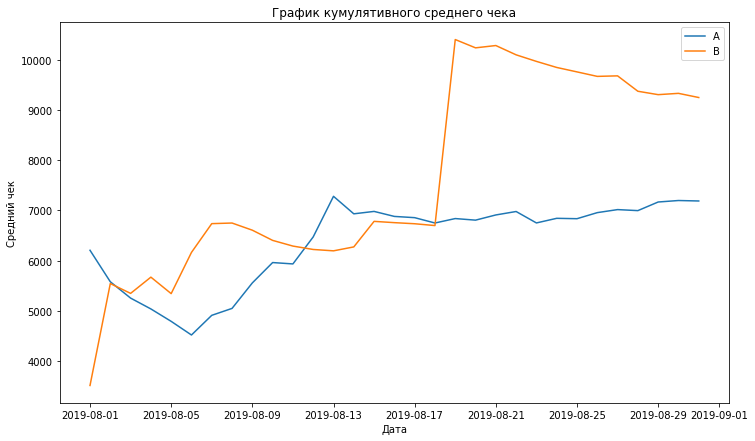

In [15]:
plt.figure(figsize=(12,7))
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.title('График кумулятивного среднего чека')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend();

График показал, что значение в группе В поднимается и опережает группу А практически всегда

В некоторые дни значения в обоих группах поднимаются - идут на спад - снова поднимаются и так далее. В группе В также в середине месяца резкий подъем с 7000 до 10 000, то есть резкий подъем выручки обусловлен увеличением среднего чека. После же показатель в группе В начинает постепенно снижаться

Ближе к концу месяца в группах показатели перестают так колебаться, средний чек группы А медленно поднимается, а группы В идет на спад после резкого подъема

Такие скачки говорят так же о выбивающихся значениях - крупных и дорогих закупках 

### График относительного изменения кумулятивного среднего чека группы B к группе A

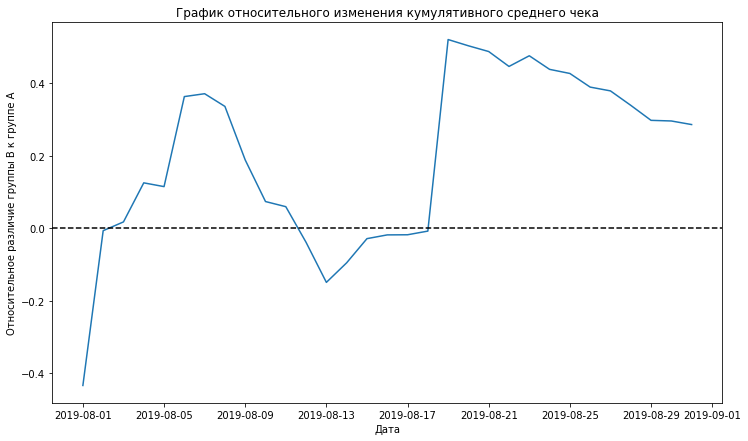

In [16]:
plt.figure(figsize=(12,7))
# cтроим отношение средних чеков
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB']/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1))
plt.title('График относительного изменения кумулятивного среднего чека')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Относительное различие группы В к группе А')
plt.xlabel('Дата');

График относительного различия еще раз доказывает, что средний чек в группе В практически везде гораздо выше 

Также можно увидеть резкие скачки вверх-вниз. Выбросы точно присутствуют

### График кумулятивного среднего количества заказов на посетителя по группам

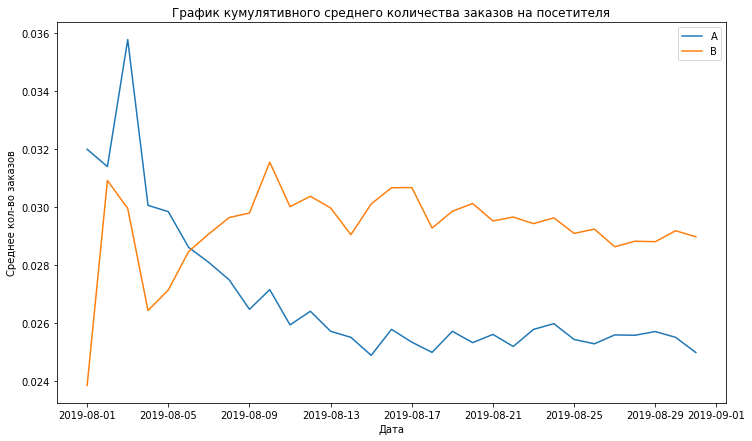

In [17]:
data['conversionA'] = data['ordersCummulativeA']/data['visitorsCummulativeA']
data['conversionB'] = data['ordersCummulativeB']/data['visitorsCummulativeB']

plt.figure(figsize=(12,7))
plt.plot(data['date'], data['conversionA'], label = 'A')
plt.plot(data['date'], data['conversionB'], label = 'B')
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.ylabel('Среднее кол-во заказов')
plt.xlabel('Дата')
plt.legend();

График конверсии посетителей в платящих пользователей в обоих группах в начале сильно колеблется, к концу же становится спокойнее

Изначально конверсия группы А была выше, но практически сразу группа В вырвалась вперед и все оставшееся время оставалась в большом отрыве

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

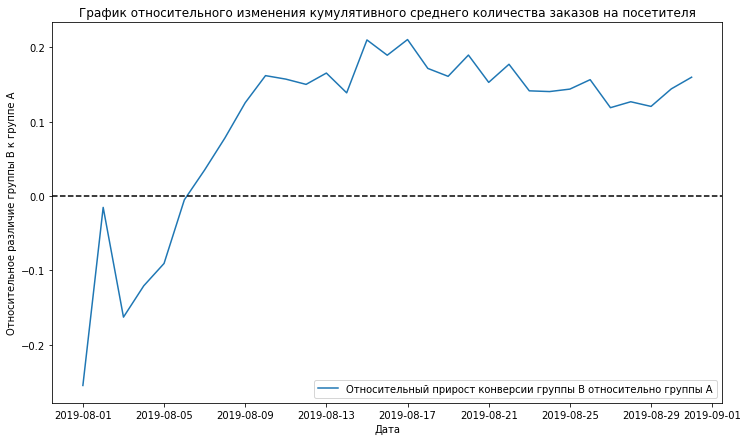

In [18]:
plt.figure(figsize=(12,7))
plt.plot(data['date'], data['conversionB']/data['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.legend()
plt.ylabel('Относительное различие группы В к группе А')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--');

По графику видно, что в начале месяца группа В на несколько дней отставала по конверсии от группы А, примерно 7 августа резко поднялась и на протяжении всего месяца держалась на высоком уровне. После резкого скачка чуть пошла на спад, но к концу месяца снова плавно поднимается

Этот график также подтверждает выбросы примерно в начале месяца

### Точечный график количества заказов по пользователям

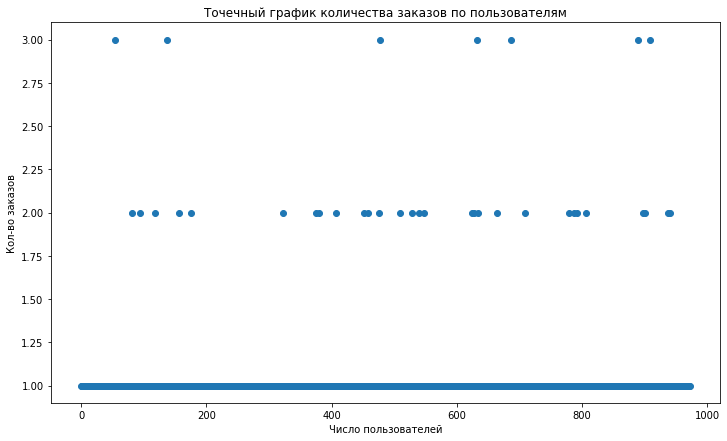

In [19]:
count_orders = orders.groupby('visitorId')['transactionId'].count().reset_index()
count_orders.columns = ['user','count_orders']
x_values = pd.Series(range(0,len(count_orders)))

plt.figure(figsize=(12,7))
plt.scatter(x_values, count_orders['count_orders'])
plt.ylabel('Кол-во заказов')
plt.xlabel('Число пользователей')
plt.title('Точечный график количества заказов по пользователям');

Большая часть пользователей делает 1-3 заказа, 4 и более совершают очень мало пользователей

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [20]:
np.percentile(count_orders['count_orders'], [95, 99])

array([1., 2.])

Аномальными буду считать значения более 2х заказов на пользователя

### Точечный график стоимостей заказов

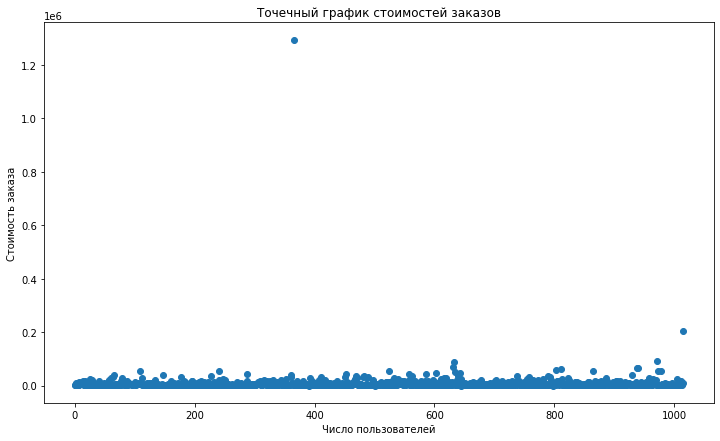

In [21]:
x_values = pd.Series(range(0,len(orders)))

plt.figure(figsize=(12,7))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Число пользователей');


На точечном графике видны аномалии рядом со значение 0.2 и более 1.2 . Сложно сделать однозначный вывод по такому графику

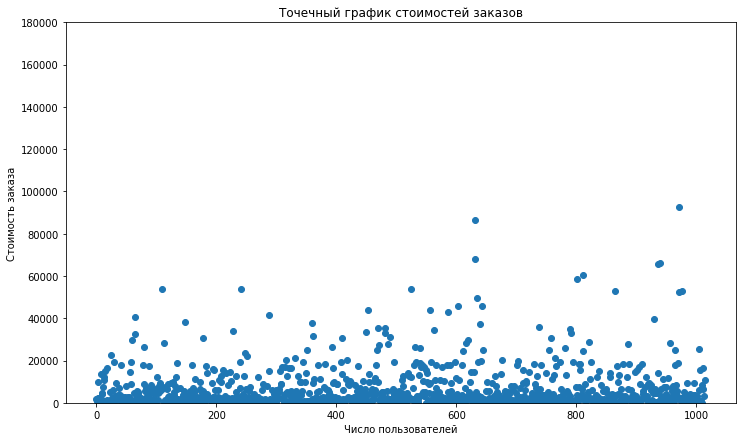

In [22]:
x_values = pd.Series(range(0,len(orders)))

plt.figure(figsize=(12,7))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Число пользователей')
plt.ylim(0, 180000);

Построила еще один график с ограничением по Y. Тут уже можно понять, что люди в основном делают заказы до 20 000. На бОльшие суммы заказов уже мало

### 95-й и 99-й перцентили стоимости заказов

In [23]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Аномальными буду считать значения стоимости заказов более 30 000

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

* Нулевая гипотеза - различий по среденему количеству заказов на посетителя между группами нет

* Альтернативная гипотеза - различия по среденему количеству заказов на посетителя в группах есть

In [24]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display("P-value:{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

"Относительное различие в средних:{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'P-value:0.011'

'Относительное различие в средних:0.160'

Непараметрический тест Уилкоксона-Манна-Уитни по сырым данным показал, что разница в среднем количестве заказов на посетителя между группами А и В статистически значима. Отвергаем нулевую гипотезу. Мы получили значение 0.011, которое меньше 0.05. А относительный выигрыш в группе В составляет 16%

По графикам ранее и правдо было видно, что группа В сильно опережает группу А и в конверсии, и в среднем чеке, и в размере выручки. Но аномальные значения могут сильно повлиять на результат, поэтому в дальнейшем проверим статистическую значимость без них

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

* Нулевая гипотеза - различий в среднем чеке заказа между группами нет

* Альтернативная гипотеза - различия в среднем чеке заказа в группах есть

In [25]:
display('P-value:{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
'Относительное различие в средних:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'P-value:0.829'

'Относительное различие в средних:0.287'

Тест по сырым даннам показал, что и в среднем чеке заказа между группами разницы нет, и нулевая гипотеза не отвергается. 0.83 гораздо больше 0.05

При этом относительная разница показала, что группа В опережает по значению среднего чека группу А на 29%

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Для начала выведем всех аномальных пользователей и соберем их в одной переменной

* Нулевая гипотеза - различий по среденему количеству заказов на посетителя между группами нет

* Альтернативная гипотеза - различия по среденему количеству заказов на посетителя в группах есть

In [26]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(count_orders['count_orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(count_orders['count_orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
dtype: int64
49


In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [28]:
display('P-value:{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
'Относительное различие : {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'P-value:0.010'

'Относительное различие : 0.187'

После удаления аномальных значений вывод не поменялся, нулевая гипотеза также отвергается. Значение увеличилось всегo на 0.002

Что касается относительного различия, оно тоже не сильно поменялось. В любом случае среднее количество заказов в группе В остается бОльшим, чем в группе А

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

* Нулевая гипотеза - различий в среднем чеке заказа между группами нет

* Альтернативная гипотеза - различия в среднем чеке заказа в группах есть

In [30]:
display('P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ))

"Относительное различие :{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )

'P-value: 0.741'

'Относительное различие :-0.027'

По очищенным данным вывод касательно различий в среднем чеке также не поменялся, нулевую гипотезу не отвергаем

Относительное различие же показало соверешенно другой результат, в отличие от сырых данных. Теперь средний чек в группе В меньше, чем в группе А на 3%

## Вывод



По проведенному анализу принимаю решение остановить тест и признать успешной группу В

Тест по среднему чеку не выявил статистической значимости между группами, но показатель относительного различия в группе В был на 3% меньше, чем в группе А. При этом тест по количеству заказов на пользователя оказался статистически значимым и показал прирост числа заказов в группе В. В дальнейшем увеличение заказов приведет и к увеличению выручки, поэтому тест является успешным